<a href="https://colab.research.google.com/github/tuxlimr/Celery_Preprocessing/blob/master/Options_pull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!jt -t grade3 -T -N -kl
#  %reload_ext google.colab.data_table

#### Install Dependencies

In [ ]:
!pip install yfinance mplfinance  py_vollib --quiet

### Nifty Last 7 Days

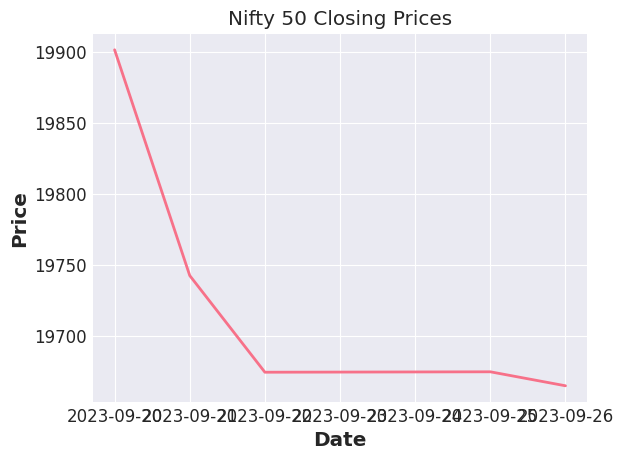

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

# Define the ticker symbol for Nifty 50
symbol = "^NSEI"

# Create a new ticker object for Nifty 50
ticker = yf.Ticker(symbol)

# Define the start and end dates for the historical data
start_date = datetime.datetime.now() - datetime.timedelta(days=7) # Last week
end_date = datetime.datetime.now() # Today's date

# Get the historical data for Nifty 50
data = ticker.history(start=start_date, end=end_date)

# Plot the closing price for Nifty 50
plt.plot(data['Close'])

# Set the plot title and axis labels
plt.title("Nifty 50 Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")

# Show the plot
plt.show()


#### Work on the Moving average Cross Over
#### Work on the Doji Candle Stick make over
#### MACD Divergence
#### *RSI Indication*:




### Options Data Today/PCR Ratio


In [ ]:
import requests
import  pandas  as pd
from datetime import date
from datetime import datetime, timedelta

today = datetime.today()
yesterday = today - timedelta(days=1)
monthly_data = today - timedelta(days=30)

url = 'https://www.nseindia.com/api/option-chain-indices?symbol=NIFTY'
headers = {
    'User-Agent':'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/109.0',
    'Accept-Encoding':'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.5'
}

session  = requests.Session()
request = session.get(url,headers=headers)
cookies = dict(request.cookies)
response = session.get(url, headers=headers, cookies=cookies).json()
rawdata = pd.DataFrame(response)
rawop = pd.DataFrame(rawdata['filtered']['data'])

def dataframe(rawop):
    data = []
    for i in range(0, len(rawop)):
        calloi = callcoi =cltp = putoi = putcoi = pltp =0
        stp = rawop['strikePrice'][i]
        if (rawop['CE'][i]==0):
            calloi = callcoi = 0
        else:
            calloi = rawop['CE'][i]['openInterest']
            callcoi = rawop['CE'][i]['changeinOpenInterest']
            cltp = rawop['CE'][i]['lastPrice']
            c_IV = rawop['CE'][i]['impliedVolatility'],
            c_IV= c_IV[0]
            c_VOl = rawop['CE'][i]['totalTradedVolume'],
            c_VOl = c_VOl[0]
        if (rawop['PE'][i] == 0):
            putoi = putcoi = 0
        else:
            putoi = rawop['PE'][i]['openInterest']
            putcoi = rawop['PE'][i]['changeinOpenInterest']
            pltp = rawop['PE'][i]['lastPrice']
            p_IV = rawop['PE'][i]['impliedVolatility'],
            p_IV = p_IV[0]
            p_VOL = rawop['PE'][i]['totalTradedVolume'],
            p_VOL = p_VOL[0]

        opdata = {
            'CALL OI': calloi, 'CALL CHNG OI': callcoi, 'CALL LTP': cltp, 'STRIKE PRICE': stp,'c_IV':c_IV,'c_VOl':c_VOl,
            'PUT OI': putoi, 'PUT CHNG OI': putcoi, 'PUT LTP': pltp, 'p_IV':p_IV, 'p_VOL' :p_VOL
        }
        data.append(opdata)
    optionchain = pd.DataFrame(data)
    return optionchain
optionchain  = dataframe(rawop)


In [ ]:
optionchain.head(50)

,CALL OI,CALL CHNG OI,CALL LTP,STRIKE PRICE,c_IV,c_VOl,PUT OI,PUT CHNG OI,PUT LTP,p_IV,p_VOL
0,4,0,0.00,12000,0.00,0,5500,-1605,0.20,278.49,16641
1,3114,-1094,6674.25,13000,0.00,1501,4206,-434,0.35,245.67,2948
2,135,-9,5656.40,14000,0.00,17,1275,-1671,0.25,199.03,4696
3,1105,-11,4660.70,15000,0.00,112,2064,-69,0.35,165.31,245
4,4178,-90,3650.80,16000,0.00,222,11582,-310,0.30,125.00,1723
5,6764,-428,2667.75,17000,0.00,1593,61250,-9860,0.15,88.99,107367
6,6,0,0.00,17450,0.00,0,2827,-361,0.20,75.57,8948
7,2876,-58,2165.20,17500,0.00,467,18399,-454,0.25,72.54,24212
8,0,0,0.00,17550,0.00,0,457,-142,0.25,73.40,1321
9,158,-150,2065.00,17600,0.00,202,5015,-339,0.25,70.59,9154


##### PCR Ratio  Calculation

In [ ]:
optionchain['PCR'] = optionchain['PUT OI']/optionchain['CALL OI']
optionchain['PCR CHG OI'] = optionchain['PUT CHNG OI']/optionchain['CALL CHNG OI']

In [ ]:
optionchain.head(20)

,CALL OI,CALL CHNG OI,CALL LTP,STRIKE PRICE,c_IV,c_VOl,PUT OI,PUT CHNG OI,PUT LTP,p_IV,p_VOL,PCR,PCR CHG OI
0,4,0,0.00,12000,0.0,0,5500,-1605,0.20,278.49,16641,1375.000000,-inf
1,3114,-1094,6674.25,13000,0.0,1501,4206,-434,0.35,245.67,2948,1.350674,0.396709
2,135,-9,5656.40,14000,0.0,17,1275,-1671,0.25,199.03,4696,9.444444,185.666667
3,1105,-11,4660.70,15000,0.0,112,2064,-69,0.35,165.31,245,1.867873,6.272727
4,4178,-90,3650.80,16000,0.0,222,11582,-310,0.30,125.00,1723,2.772140,3.444444
5,6764,-428,2667.75,17000,0.0,1593,61250,-9860,0.15,88.99,107367,9.055293,23.037383
6,6,0,0.00,17450,0.0,0,2827,-361,0.20,75.57,8948,471.166667,-inf
7,2876,-58,2165.20,17500,0.0,467,18399,-454,0.25,72.54,24212,6.397427,7.827586
8,0,0,0.00,17550,0.0,0,457,-142,0.25,73.40,1321,inf,-inf
9,158,-150,2065.00,17600,0.0,202,5015,-339,0.25,70.59,9154,31.740506,2.260000


In [ ]:
Call_OI_Sum = optionchain['CALL OI'].sum()
Put_OI_Sum = optionchain['PUT OI'].sum()


print(Call_OI_Sum,'/' ,Put_OI_Sum)
pcr= Put_OI_Sum/Call_OI_Sum

print(f"PCR:{pcr} ")

print("________Market Status_______________")

if pcr < 1.2 and pcr > 0.8 :
  print(" Market is Side Ways")
elif pcr >=1.2 and pcr <= 1.5 :
   print(" Market is Bullish")
elif pcr > 1.5 :
   print(" Market is very Bullish")
elif pcr <0.8 and pcr >= 0.5 :
   print(" Market is Bearish")
else:
  print("Vey Bearish")


3296000 / 3122483
PCR:0.9473552791262136 
________Market Status_______________
 Market is Side Ways


## Strategybuilder

**Short Straddle**: Short Straddle means we sell PE/CE **at the money** and get profit by theta decay. However it is limited upto certain range then it will start losing money. Here profit will be always at peak.

**Short Strangle**: Short Straddle means we sell PE/CE **out of the money** and get profit by theta decay. However it is limited upto certain range then it will start losing money. Here profit will be more area than the normal


### Bull Spread

### Bear Spread

### IRON Butterfly

In [ ]:
import pandas as pd

# define the strike price and premiums for each option
strike_price = 17400
upper_sp = 17250
lower_sp = 16750
str1 = optionchain[optionchain['STRIKE PRICE'] == strike_price]
str2 = optionchain[optionchain['STRIKE PRICE'] == upper_sp]
str3 = optionchain[optionchain['STRIKE PRICE'] == lower_sp]
call_premium = float(str1['CALL LTP'])
put_premium = float(str1['PUT LTP'])
higher_call_premium = float(str2['CALL LTP'])
lower_put_premium = float(str3['PUT LTP'])

# calculate the total cost of the premiums for the options purchased
total_premium_cost = higher_call_premium + lower_put_premium

# calculate the total amount received from selling the call and put options
total_premium_received = (call_premium + put_premium)

# calculate the maximum profit and loss for the iron butterfly
max_profit = round(total_premium_received - total_premium_cost)
perlot_profit = max_profit * 50

# create a dictionary with the results
results_dict = {
    "Strike Price/UP/DOWN": [f"{strike_price}/{upper_sp}/{lower_sp}"],
    "Call Premium": [call_premium],
    "Put Premium": [put_premium],
    "Higher Call Premium": [higher_call_premium],
    "Lower Put Premium": [lower_put_premium],
    "Total Premium Received": [total_premium_received],
    "Total Premium Cost": [total_premium_cost],
    "Maximum Profit": [max_profit],
    "PerLot Profit": [perlot_profit]
}

# convert the dictionary to a dataframe
results_df = pd.DataFrame.from_dict(results_dict)

# display the dataframe
results_df

In [ ]:
import pandas as pd

# define the strike prices and premiums for each option
strike_prices = [17200, 17300, 17400, 17500]
upper_sp = [17300, 17400, 17500, 17600]
lower_sp = [17100, 17200, 17300, 17400]
premiums = []

for i in range(len(strike_prices)):
    str1 = optionchain[optionchain['STRIKE PRICE'] == strike_prices[i]]
    str2 = optionchain[optionchain['STRIKE PRICE'] == upper_sp[i]]
    str3 = optionchain[optionchain['STRIKE PRICE'] == lower_sp[i]]

    call_premium = float(str1['CALL LTP'])
    put_premium = float(str1['PUT LTP'])
    higher_call_premium = float(str2['CALL LTP'])
    lower_put_premium = float(str3['PUT LTP'])

    # calculate the total cost of the premiums for the options purchased
    total_premium_cost = higher_call_premium + lower_put_premium

    # calculate the total amount received from selling the call and put options
    total_premium_received = (call_premium + put_premium)

    # calculate the maximum profit and loss for the iron butterfly
    max_profit = round(total_premium_received - total_premium_cost)
    per_lot_profit = max_profit * 50

    premiums.append([strike_prices[i], upper_sp[i], lower_sp[i], call_premium, put_premium, higher_call_premium, lower_put_premium, total_premium_received, total_premium_cost, max_profit, per_lot_profit])

# create a DataFrame to store the results
df = pd.DataFrame(premiums, columns=['Strike Price', 'Upper Strike Price', 'Lower Strike Price', 'Call Premium', 'Put Premium', 'Higher Call Premium', 'Lower Put Premium', 'Total Premium Received', 'Total Premium Cost', 'Maximum Profit', 'PerLot Profit'])

df


In [ ]:
import pandas as pd

# define the strike prices and premiums for each option
y = 17200
strike_prices = [y+ i *100 for i in range(6)]
premiums = []

for i in range(len(strike_prices)):
    upper_sp = strike_prices[i] + 100
    lower_sp = strike_prices[i] - 100
    str1 = optionchain[optionchain['STRIKE PRICE'] == strike_prices[i]]
    str2 = optionchain[optionchain['STRIKE PRICE'] == upper_sp]
    str3 = optionchain[optionchain['STRIKE PRICE'] == lower_sp]

    call_premium = float(str1['CALL LTP'])
    put_premium = float(str1['PUT LTP'])
    higher_call_premium = float(str2['CALL LTP'])
    lower_put_premium = float(str3['PUT LTP'])

    # calculate the total cost of the premiums for the options purchased
    total_premium_cost = higher_call_premium + lower_put_premium

    # calculate the total amount received from selling the call and put options
    total_premium_received = (call_premium + put_premium)

    # calculate the maximum profit and loss for the iron butterfly
    max_profit = round(total_premium_received - total_premium_cost)
    per_lot_profit = max_profit * 50

    premiums.append([strike_prices[i], upper_sp, lower_sp, call_premium, put_premium, higher_call_premium, lower_put_premium, total_premium_received, total_premium_cost, max_profit, per_lot_profit])

# create a DataFrame to store the results
df = pd.DataFrame(premiums, columns=['Strike Price', 'Upper Strike Price', 'Lower Strike Price', 'Call Premium', 'Put Premium', 'Higher Call Premium', 'Lower Put Premium', 'Total Premium Received', 'Total Premium Cost', 'Maximum Profit', 'PerLot Profit'])

df

In [ ]:
import pandas as pd

# define the strike prices and premiums for each option
y = 19800
strike_prices = [y + i * 100 for i in range(6)]
premiums = []

for i in range(len(strike_prices)):
    upper_sp = strike_prices[i] + 100
    lower_sp = strike_prices[i] - 100
    str1 = optionchain[optionchain['STRIKE PRICE'] == strike_prices[i]]
    str2 = optionchain[optionchain['STRIKE PRICE'] == upper_sp]
    str3 = optionchain[optionchain['STRIKE PRICE'] == lower_sp]

    call_premium = float(str1['CALL LTP'])
    put_premium = float(str1['PUT LTP'])
    higher_call_premium = float(str2['CALL LTP'])
    lower_put_premium = float(str3['PUT LTP'])

    # calculate the total cost of the premiums for the options purchased
    total_premium_cost = higher_call_premium + lower_put_premium

    # calculate the total amount received from selling the call and put options
    total_premium_received = call_premium + put_premium

    # calculate the maximum profit and loss for the iron butterfly
    max_profit = round(total_premium_received - total_premium_cost, 2)
    per_lot_profit = max_profit * 50

    # calculate the break-even points
    # upper_break_even = upper_sp + total_premium_cost/2
    # lower_break_even = lower_sp - total_premium_cost/2

    # upper_break_even = strike_prices[i] + higher_call_premium
    # lower_break_even = strike_prices[i] - lower_put_premium

    upper_break_even = strike_prices[i] + total_premium_received
    lower_break_even = strike_prices[i] - total_premium_received
    premiums.append([
        strike_prices[i],
        upper_sp,
        lower_sp,
        call_premium,
        put_premium,
        higher_call_premium,
        lower_put_premium,
        total_premium_received,
        total_premium_cost,
        max_profit,
        per_lot_profit,
        upper_break_even,
        lower_break_even
    ])

# create a DataFrame to store the results
df = pd.DataFrame(
    premiums,
    columns=[
        'Strike Price',
        'Upper Strike Price',
        'Lower Strike Price',
        'Call Premium',
        'Put Premium',
        'Higher Call Premium',
        'Lower Put Premium',
        'Total Premium Received',
        'Total Premium Cost',
        'Maximum Profit',
        'PerLot Profit',
        'Upper Break-Even',
        'Lower Break-Even'
    ]
)

df


In [ ]:


from py_vollib.black_scholes_merton.implied_volatility import implied_volatility
from py_vollib.black_scholes_merton import black_scholes_merton
from math import exp, sqrt

# Define the inputs
S = 17450  # Current stock price
K = 17400  # Strike price of the options
r = 0.05  # Risk-free interest rate
T = 30 / 365  # Time to expiration in years
sigma = 0.2  # Implied volatility
q = 0  # Dividend yield

# Calculate the option prices using Black-Scholes-Merton
call_price = black_scholes_merton('c', S, K, T, r, sigma, q)
put_price = black_scholes_merton('p', S, K, T, r, sigma, q)

# Calculate the prices for the higher and lower strike options
higher_strike_price = 17600
lower_strike_price = 17200
buy_call_price = black_scholes_merton('c', S, higher_strike_price, T, r, sigma, q)
buy_put_price = black_scholes_merton('p', S, lower_strike_price, T, r, sigma, q)

# Calculate the net credit and breakeven prices
credit = call_price + put_price - buy_call_price - buy_put_price
upper_breakeven = K + credit
lower_breakeven = K - credit

# Print the strategy details
print(f"Iron Butterfly with a strike price of {K}:")
print(f"Net credit: {credit:.2f}")
print(f"Upper breakeven: {upper_breakeven:.2f}")
print(f"Lower breakeven: {lower_breakeven:.2f}")
print(f"Maximum profit: {credit:.2f}")
print(f"Maximum loss: {abs(credit - (higher_strike_price - lower_strike_price)):.2f}")


nb

In [ ]:
df = rows.round(2).applymap(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))

def highlight_col(s):
    d = ['background-color: yellow;color: red' if v == s.max() else '' for v in s]
    return d



# df.style.apply(highlight_col, subset=['CALL CHNG OI'])

df.style.apply(highlight_col)


### Important Premium

#### Find Real Nifty Index Price
* Find from Google Finance

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.google.com/finance'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
nifty_index = soup.find('div', {'class': 'YMlKec'}).text
print('Nifty-50 index value:', nifty_index)


In [ ]:
num = round(int(float(nifty_index.replace(',', ''))),4)
rounded_num = round(num/100)*100
rounded_num


#### Find and define range and Find `CE` and `PE` premiums

In [ ]:
rows_with_c = optionchain[optionchain['STRIKE PRICE'] == 17400]

In [ ]:
rows_with_c

In [ ]:
# Get the index of the row(s) with 'c'
idx = rows_with_c.index[0]

# Select the row(s) with 'c' and the Two level up and down rows
rows = optionchain.iloc[idx-2:idx+3]

rows

## Check Nifty 50 chart with VWAP

In [ ]:
import yfinance as yf
import mplfinance as mpf

# Define the ticker symbol for Nifty50
ticker_symbol = '^NSEI'

# Define the start and end dates for the chart
start_date = monthly_data
end_date = today

# Download the data for Nifty50
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the VWAP
data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3
data['TPV'] = data['TP'] * data['Volume']
data['Cumulative TPV'] = data['TPV'].cumsum()
data['Cumulative Volume'] = data['Volume'].cumsum()
data['VWAP'] = data['Cumulative TPV'] / data['Cumulative Volume']

# Plot the chart with VWAP indicator
mpf.plot(data, type='candle', volume=True, mav=(20, 50), addplot=[mpf.make_addplot(data['VWAP'], color='red')])


In [ ]:
data.tail()

In [ ]:
import yfinance as yf
import mplfinance as mpf

# Define the ticker symbol for Nifty50
ticker_symbol = '^NSEI'

# Define the start and end dates for the chart
monthly_data =  '2023-02-01'
start_date = monthly_data
# end_date = today
end_date = '2023-10-01'

# Download the data for Nifty50
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the VWAP
data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3
data['TPV'] = data['TP'] * data['Volume']
data['Cumulative TPV'] = data['TPV'].cumsum()
data['Cumulative Volume'] = data['Volume'].cumsum()
data['VWAP'] = data['Cumulative TPV'] / data['Cumulative Volume']

# Calculate the 20-day moving average
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA5'] = data['Close'].rolling(window=5).mean()



# Plot the chart with VWAP and 20-day moving average indicators
mpf.plot(data, type='candle', volume=True, mav=(20), addplot=[mpf.make_addplot(data['VWAP'], color='red'), mpf.make_addplot(data['MA20'], color='blue'),
                                                              mpf.make_addplot(data['MA10'], color='green'),
                                                              mpf.make_addplot(data['MA5'], color='orange'),

                                                              ])


In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ticker symbol for Nifty50
ticker_symbol = "^NSEI"

# Define the start and end dates for the chart
start_date = "2022-03-01"
end_date = "2023-07-08"

# Download the data for Nifty50
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the 50-day and 200-day simple moving averages
data["SMA20"] = data["Close"].rolling(window=20).mean()
data["SMA50"] = data["Close"].rolling(window=50).mean()

# Define the thresholds for the Dow Zones
accumulation_threshold = 0.03
distribution_threshold = -0.03

# Classify each day's closing price into one of the three Dow Zones
data["Dow Zone"] = ""
for i in range(len(data)):
    if data["Close"][i] > data["SMA50"][i] * (1 + accumulation_threshold):
        data["Dow Zone"][i] = "Accumulation Zone"
    elif data["Close"][i] < data["SMA50"][i] * (1 + distribution_threshold):
        data["Dow Zone"][i] = "Distribution Zone"
    else:
        data["Dow Zone"][i] = "Markup Zone"

# Plot the chart with Dow Zones indicators
sns.set_style("darkgrid")
sns.set_palette("husl")
plt.figure(figsize=(12, 8))
plt.plot(data.index, data["Close"], label="Close")
plt.plot(data.index, data["SMA20"], label="SMA20")
plt.plot(data.index, data["SMA50"], label="SMA50")
plt.scatter(
    data.index,
    data["Close"],
    c=data["Dow Zone"].map(
        {
            "Accumulation Zone": "green",
            "Markup Zone": "blue",
            "Distribution Zone": "red",
        }
    ),
    alpha=0.5,
)
plt.legend()
plt.title("Nifty50")
plt.ylabel("Price")
plt.show()



In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ticker symbol for Nifty50
ticker_symbol = '^NSEI'

# Define the start and end dates for the chart
start_date = '2022-11-01'
end_date = '2023-10-06'

# Download the data for Nifty50
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the moving averages
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA5'] = data['Close'].rolling(window=5).mean()

# Define the thresholds for the Dow Zones
accumulation_threshold = 0.03
distribution_threshold = -0.03

# Classify each day's closing price into one of the three Dow Zones
data['Dow Zone'] = ''
for i in range(len(data)):
    if data['Close'][i] > data['SMA50'][i] * (1 + accumulation_threshold):
        data['Dow Zone'][i] = 'Accumulation Zone'
    elif data['Close'][i] < data['SMA50'][i] * (1 + distribution_threshold):
        data['Dow Zone'][i] = 'Distribution Zone'
    else:
        data['Dow Zone'][i] = 'Markup Zone'

# Create the Seaborn plot
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the closing price and moving averages
sns.lineplot(data=data['Close'], ax=ax, label='Close')
sns.lineplot(data=data['SMA20'], ax=ax, label='20-day SMA')
sns.lineplot(data=data['SMA50'], ax=ax, label='50-day SMA')
sns.lineplot(data=data['SMA5'], ax=ax, label='5-day SMA')

# Add the Dow Zones indicator
colors = {'Accumulation Zone': 'green', 'Markup Zone': 'blue', 'Distribution Zone': 'red'}
for zone in colors.keys():
    zone_data = data[data['Dow Zone'] == zone]
    if not zone_data.empty:
        sns.scatterplot(data=zone_data, x=zone_data.index, y='Close', ax=ax, color=colors[zone], s=100, alpha=0.5)

# Set the title and labels
ax.set_title('Nifty50', fontsize=20)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

# Add the legend
ax.legend(fontsize=14)

# Show the plot
plt.show()
